# Timing and Plotting

## 1. Timing

The [`time`](https://docs.python.org/3/library/time.html#module-time) module contains functions for obtaining and interpreting the current system time.

In [30]:
import time
my_time = time.time()
print("Seconds since epoch =", my_time)
#time.time() // (365 * 24 * 60 * 60) # years since epoch

Seconds since epoch = 1657274841.554562


Several functions in the time module such as <code>gmtime()</code>, <code>asctime()</code> etc. either take <code>time.struct_time</code> object as an argument or return it.

The <code>time()</code> function returns the number of seconds passed since epoch. For Unix system, <code>January 1, 1970, 00:00:00</code> at UTC is epoch (the point where time begins). Monday is 0

In [47]:
time.localtime(time.time())

time.struct_time(tm_year=2022, tm_mon=7, tm_mday=7, tm_hour=13, tm_min=4, tm_sec=58, tm_wday=3, tm_yday=188, tm_isdst=0)

The <code>time.ctime()</code> function takes seconds passed since epoch as an argument and returns a string representing local time.

In [31]:
import time

# seconds passed since epoch
my_time = time.time()
local_time = time.ctime(my_time)
print("Local time:", local_time)

Local time: Fri Jul  8 13:07:47 2022


The <code>sleep()</code> function suspends (delays) execution of the current thread for the given number of seconds.

In [32]:
import time

print("Print this!")

time.sleep(2)

print("Then print this after 2 seconds")

Print this!
Then print this after 2 seconds


### Building a timing utility

Generally, we can build a utility function for timing the execution of a passed-in function:

In [33]:
def timeit(fn):
    starttime = time.time()
    
    fn()
    
    endtime = time.time()
    
    return endtime - starttime

In [34]:
import time

starttime = time.time()

#####
    
def fn1():
    lst = [14, 8, -23, 4, 6, 10, -18, 5, 5, 11]
    maxSum = lst[0]
    sumz = 0
    for i in range(0, len(lst)):
        sumz += lst[i]
        if sumz < 0:
            sumz = 0
        elif (maxSum < sumz):
            maxSum = sumz
    return maxSum

print("Maximum Sub Array Sum =", fn1())

####

endtime = time.time()
    
used_time = endtime - starttime

print('Time used to execute the code:',used_time, 'seconds' )



Maximum Sub Array Sum = 23
Time used to execute the code: 0.00036978721618652344 seconds


In [35]:
import time
starttime = time.time()

#####
    
def fn2():
    lst = [14, 8, -23, 4, 6, 10, -18, 5, 5, 11]
    maxSum = lst[0]
    for i in range(0, len(lst)):
        sumz = 0
        for j in range(i, len(lst)):
            sumz += lst[j]
            if sumz > maxSum:
                maxSum = sumz
    return maxSum

print("Maximum Sub Array Sum =", fn2())

####

endtime = time.time()
    
used_time = endtime - starttime

print('Time used to execute the code:',used_time, 'seconds' )

Maximum Sub Array Sum = 23
Time used to execute the code: 0.0005450248718261719 seconds


### The `timeit` module

The [`timeit`](https://docs.python.org/3/library/timeit.html) module is a built-in library for measuring the execution of code passed in as a string.

In [53]:
total = 0
for number in range(1, 10000):
    total += number
print("Sum =", total)

Sum = 49995000


In [54]:
sum(range(10_000))

49995000

In [55]:
sum(range(1, 10000))

49995000

In [56]:
import timeit
timeit.timeit('sum(range(10_000))', number=1000)

0.1572331859933911

It also supports passing in "setup" code that is not timed.

In [57]:
timeit.timeit('sum(r)', 
              setup='r = range(10_000)', 
              number=1000)

0.15215791700029513

We can easily use this to gather timings for multiple input values:

In [58]:
[timeit.timeit('sum(r)',
               setup=f'r = range({n})',
               number=1000)
 for n in range(1000, 11_000, 1000)]

[0.015224082999338862,
 0.029374090998317115,
 0.04232334699918283,
 0.05501350700069452,
 0.0679143740053405,
 0.08323154200479621,
 0.10028718900139211,
 0.11414188300113892,
 0.14012010699661914,
 0.14760735400341218]

Sometimes we might want to make use of functions defined in our notebook in the timed/setup code passed to `timeit`. We need to use the `globals` argument for this:

### Fibonacci sequence

In [26]:
# 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181

def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [29]:
# for 20 terms of the Fibonacci sequence
print([fib(n) for n in range(20)], end="")

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]

In [61]:
# "globals()" returns a dictionary of everything defined in this module; timeit needs it to access `fib`

[timeit.timeit(f'fib({n})',
               number=1000,
               globals=globals()) 
 for n in range(1, 15)]

[0.00011875000200234354,
 0.0002775149987428449,
 0.0006013579986756667,
 0.0010402400002931245,
 0.002107328000420239,
 0.0033637919987086207,
 0.005822557999636047,
 0.008553992003726307,
 0.011955415000556968,
 0.01947221500449814,
 0.02961901000526268,
 0.04811121999955503,
 0.0794843750045402,
 0.12637863399868365]

### Magic timing commands

There are also "magic" notebook commands that can be used to time code -- they are `%time`, `%timeit`, and `%%timeit`

In [62]:
%time sum(range(10_000))

CPU times: user 137 µs, sys: 0 ns, total: 137 µs
Wall time: 139 µs


49995000

In [63]:
%timeit -n 1000 sum(range(10_000))

145 µs ± 4.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 2. Plottings

The [matplotlib library](https://matplotlib.org) supports the creation of all sorts of visualizations. We will use it for drawing simple 2-dimensional plots.

The primary plotting function we will use is `matplotlib.pyplot.plot` ([full documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)), which, when passed two "array-like" objects of equal length, will interpret and plot their contents as x and y axis coordinates. We will generally use tuples, lists, and ranges as array-like objects. Note that generators are *not* considered array-like by matplotlib.

Some examples (note that we use a semicolon after the call to `plot` to hide its return value):

In [36]:
import matplotlib.pyplot as plt


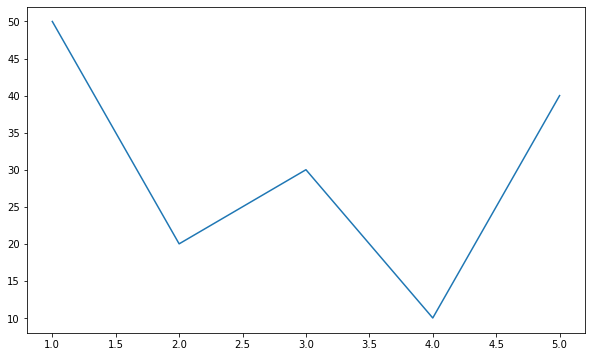

In [65]:
plt.plot([1, 2, 3, 4, 5], [50, 20, 30, 10, 40]);

We can also provide an optional format string to `plot`, which controls marker, line-style, and color for the plot.

Here's a shortened list of options copied from the [full documentation of `plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot):

**Markers**

  - `.` : point marker
  - `o` : circle marker
  - `s` : square marker
  - `d` : diamond marker

**Line-styles**
 
  - `-` : solid line style
  - `--` : dashed line style
  - `:` : dotted line style

**Colors**

  - `k` : black
  - `r` : red
  - `g` : blue
  - `b` : green
  - `y` : yellow
  - `c` : cyan
  
Here are the above plots with some color and styling (if we omit a line style no connecting line is drawn between data points):

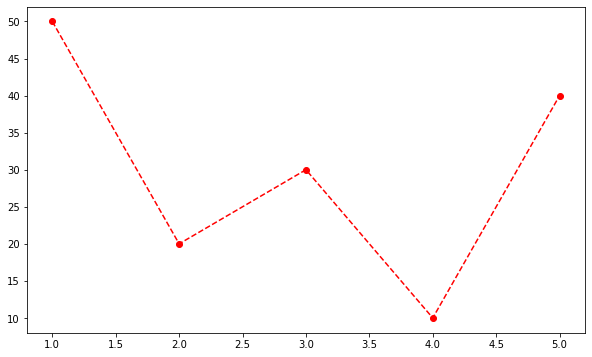

In [66]:
plt.plot([1, 2, 3, 4, 5], [50, 20, 30, 10, 40], 'o--r');

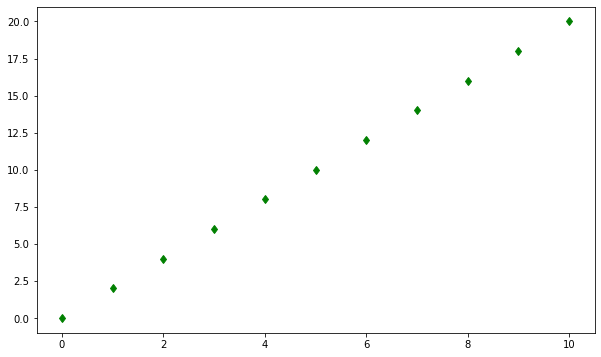

In [67]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys, 'dg');

## 3. Array Lists

### NumPy Package

Instead of regular `range` objects, which only allow for integral start/stop/step values, we typically prefer to use the [numpy library](https://numpy.org)'s `arange` and `linspace` functions with matplotlib. `arange` is like `range`, except we can use floating point values for start/stop/step. `linspace` lets us specify start and stop values (both inclusive), and the number of values to return in that interval.

Examples of `arange` and `linspace` calls (note that both functions return numpy arrays, which are iterable and can be passed to `plot`):

We also use NumPy which is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python. It is open-source software. It contains various features including these important ones:

- A powerful N-dimensional array object
- Sophisticated (broadcasting) functions
- Tools for integrating C/C++ and Fortran code
- Useful linear algebra, Fourier transform, and random number capabilities



In [38]:
import numpy as np

np.arange(0.5, 2.5, 0.1)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4])

In [4]:
# from 10 to 20 inclusive get 41 values

np.linspace(10, 20, 41)

array([10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
       12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
       14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 ,
       16.75, 17.  , 17.25, 17.5 , 17.75, 18.  , 18.25, 18.5 , 18.75,
       19.  , 19.25, 19.5 , 19.75, 20.  ])

In [10]:
np.linspace(1, 100000, 50, dtype=int) # we can specify the data type to coerce values into integers

array([     1,   2041,   4082,   6123,   8164,  10204,  12245,  14286,
        16327,  18368,  20408,  22449,  24490,  26531,  28572,  30612,
        32653,  34694,  36735,  38776,  40816,  42857,  44898,  46939,
        48980,  51020,  53061,  55102,  57143,  59184,  61224,  63265,
        65306,  67347,  69388,  71428,  73469,  75510,  77551,  79592,
        81632,  83673,  85714,  87755,  89796,  91836,  93877,  95918,
        97959, 100000])

`plot` can be called multiple times in the same cell to draw multiple lines in the same chart. Below we use this facility together with `linspace` and a handful of list comprehensions to plot some common runtime complexity bounding functions (more on that soon) over a small interval: 

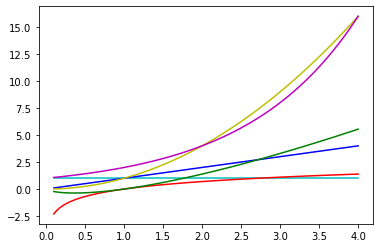

In [13]:
import math

count = 100
xs = np.linspace(0.1, 4, count)
ys_const        = [1] * count
ys_log          = [math.log(x) for x in xs]
ys_linear       = [x for x in xs]
ys_linearithmic = [x * math.log(x) for x in xs]
ys_quadratic    = [x**2 for x in xs]
ys_exponential  = [2**x for x in xs]

plt.plot(xs, ys_const, 'c')
plt.plot(xs, ys_log, 'r')
plt.plot(xs, ys_linear, 'b')
plt.plot(xs, ys_linearithmic, 'g')
plt.plot(xs, ys_quadratic, 'y');
plt.plot(xs, ys_exponential, 'm');

### Plotting timings

Plotting timing data collected from functions may help give us a sense of how their runtimes scale with increasing input sizes.

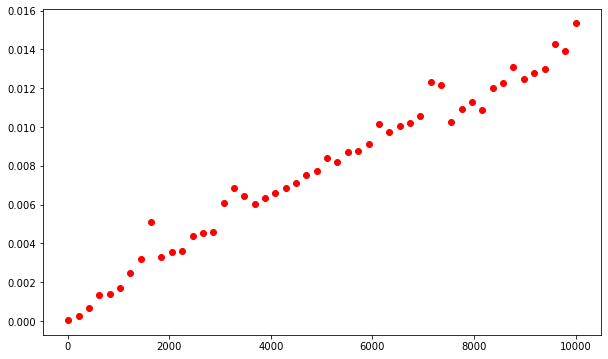

In [37]:
# runtimes for sum for increasing sizes of input

import timeit

ns = np.linspace(10, 10_000, 50, dtype=int)
ts = [timeit.timeit(f'sum(range({n}))', number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

Clearly, the runtime of `sum` is directly proportional to the number of values it operates on. 

If we assume a linear relationship, we can compute the average slope between adjacent data points to come up with an line of approximate fit that may help us predict the runtime of `sum`.

In [23]:
total = 0

for i in range(len(ns)-1):
    total += (ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) # recall: slope = rise / run
    
avg_slope = total / (len(ns)-1)

avg_slope

1.338174756126575e-06

We can also use the statistics module to help us compute the mean:

In [24]:
import statistics
avg_slope = statistics.mean((ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) for i in range(len(ns)-1))
avg_slope

1.3381747561265745e-06

## Exercise 8